# CS229, Fall 2017

## Problem Set 1: Supervised Learning
### 1. Logistic regression

#### (a)
The key point in linear regression and logistic regression is likelihood. Here is my understanding of what likelihood actually means here.  
Consider the way we get our training data as one sampling. Let's call it event A.  
The likelihood is the probability of event A to happen under paramater $\theta$, so what we want to do is to find appropriate $\theta$ so we can maximize this probabilty.  
This is true because we assume that, the result of our sample has the highest probability to happen, so we can get this result (here is the training data).

##### Solution
First, we have:
$$(x^{\mathrm T}z)^2=(\sum_iz_ix_i)\times(\sum_jx_jz_j)=\sum_{i}\sum_{j}z_ix_ix_jz_j\ge 0$$
Also, calculating the second derivative of $J(\theta)$ yields:
$$\frac{\partial J(\theta)}{\partial \theta_i \theta_j}=\frac{1}{m}\bigg(\sum_k \frac{e^{a^{(k)}}}{(1+e^{a^{(k)}})^2}{y^{(k)}}^2x^{(k)}_ix^{(k)}_j\bigg)$$
where $a^{(i)}=y^{(i)}\theta^{\mathrm T}x^{(i)}$  
So for any vector z, we have:
$$z^{\mathrm T}Hz=\sum_i\sum_jz_i\frac{\partial J(\theta)}{\partial \theta_i \theta_j}z_j=\frac{1}{m}\bigg(\sum_i\sum_j\sum_k \frac{e^{a^{(k)}}}{(1+e^{a^{(k)}})^2}{y^{(k)}}^2z_ix^{(k)}_ix^{(k)}_jz_j\bigg)\\=\frac{1}{m}\sum_k \frac{e^{a^{(k)}}}{(1+e^{a^{(k)}})^2}{y^{(k)}}^2\bigg(\sum_i\sum_jz_ix^{(k)}_ix^{(k)}_jz_j\bigg)$$
the last part of the above term, accroding to what we have proved above, is always greater that or equal to zero. So it is quite obivous that $z^{\mathrm T}Hz\ge 0$

#### (b)
First, we implement Newton's method

In [1]:
import numpy as np


def sigmoid(z):
    ''' return the result of sigmoid function in matrix form '''
    return 1 / (1 + np.exp(-z))


def cal_cost(theta, X, y):
    ''' return the value of cost function defining is this problem '''
    m = X.shape[0]
    h = sigmoid((X @ theta) * y)
    return (-1 / m) * np.sum(np.log(h), 0)


def cal_gradient(theta, X, y):
    ''' return the gradient (first derivative) '''
    m = X.shape[0]
    h = sigmoid((X @ theta) * y)
    return (-1 / m) * (((1 - h) * y).T @ X).T


def cal_Hessian(theta, X, y):
    ''' return the Hessian matrix (second derivative) '''
    m = X.shape[0]
    h = sigmoid((X @ theta) * y)
    y = (y * y * h * h) / np.exp((X @ theta) * y)
    y = np.c_[y]
    return (1 / m) * (X.T @ (X * y))


def Newton_method(initial_theta, X, y, maxiter, alpha):
    m = X.shape[0]  # m is the number of samples in the training set
    theta = initial_theta

    # Get J(theta)
    cost = cal_cost(theta=theta, X=X, y=y)
    count = 0

    while count < maxiter:
        count = count + 1
        print('cost: %f' % cost)
        # There are two things to calculate
        # First, try to calculate the gradient
        gradient = cal_gradient(theta=theta, X=X, y=y)

        # Second, try to calculate the Hessian matrix
        Hessian = cal_Hessian(theta=theta, X=X, y=y)

        # Update the value of theta
        theta = theta - alpha * (np.linalg.inv(Hessian) @ gradient)

        # Update cost
        cost_t = cal_cost(theta=theta, X=X, y=y)
        if np.abs(cost_t - cost) < 0.0000001:
            break
        else:
            cost = cost_t

    return theta

#### (c)
Next, we read in the data and visualize it

cost: 0.693147
cost: 0.639750
cost: 0.595983
cost: 0.559416
cost: 0.528436
cost: 0.501922
cost: 0.479061
cost: 0.459244
cost: 0.442002
cost: 0.426962
cost: 0.413826
cost: 0.402344
cost: 0.392310
cost: 0.383547
cost: 0.375901
cost: 0.369241
cost: 0.363450
cost: 0.358425
cost: 0.354076
cost: 0.350320
cost: 0.347085
cost: 0.344307
cost: 0.341927
cost: 0.339895
cost: 0.338165
cost: 0.336696
cost: 0.335452
cost: 0.334402
cost: 0.333517
cost: 0.332775
cost: 0.332153
cost: 0.331633
cost: 0.331200
cost: 0.330839
cost: 0.330540
cost: 0.330293
cost: 0.330088
cost: 0.329918
cost: 0.329779
cost: 0.329664
cost: 0.329570
cost: 0.329493
cost: 0.329429
cost: 0.329377
cost: 0.329335
cost: 0.329300
cost: 0.329272
cost: 0.329249
cost: 0.329230
cost: 0.329214
cost: 0.329202
cost: 0.329192
cost: 0.329183
cost: 0.329177
cost: 0.329171
cost: 0.329167
cost: 0.329163
cost: 0.329160
cost: 0.329158
cost: 0.329156
cost: 0.329154
cost: 0.329153
cost: 0.329152
cost: 0.329151
cost: 0.329150
cost: 0.329150
cost: 0.32

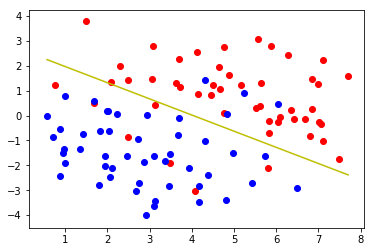

In [10]:
import matplotlib.pyplot as plt

X = np.loadtxt('./data/logistic_x.txt')
y = np.loadtxt('./data/logistic_y.txt')

data = np.c_[X, y]

pos = data[data[:, -1] == 1]
neg = data[data[:, -1] == -1]

# Training the model
X = np.c_[X, np.ones(X.shape[0])]
initial_theta = np.zeros(X.shape[1])
theta = Newton_method(initial_theta=initial_theta, X=X, y=y, maxiter=200, alpha=0.1)
print(theta)
# Visualize the result
minx = X[:, 0:1].min(0)
maxx = X[:, 0:1].max(0)
x = np.linspace(minx, maxx, 50)
plt.scatter(pos[:, 0], pos[:, 1], c='r')
plt.scatter(neg[:, 0], neg[:, 1], c='b')
plt.plot(x, -theta[0]/theta[1]*x-theta[2], 'y')
plt.show()
